<a href="https://colab.research.google.com/github/GuptaRitik/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1 -Ritik Gupta**
##### **Team Member 2 - NA**
##### **Team Member 3 - NA**
##### **Team Member 4 - NA**

# **Project Summary -**

# **GitHub Link -**

***Repository Link***:- https://github.com/GuptaRitik/Zomato-Restaurant-Clustering-And-Sentiment-Analysis

# **Problem Statement**


**In today's competitive restaurant industry, it is crucial for companies to understand the market and target the right audience in order to drive growth and success. This project aims to provide a comprehensive solution to this problem by utilizing advanced data analytics and machine learning techniques to cluster Zomato restaurants into segments based on various factors such as cuisine and cost. By understanding the market segments, the company will be able to target the right audience and make data-driven decisions. Additionally, the project will also analyze customer sentiment and reviews, which will account for 40% of the project, to extract valuable insights and identify areas for improvement that can increase customer satisfaction. Overall, this project aims to empower the restaurant industry with a thorough understanding of the market and actionable recommendations for driving business growth.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [ ]:
# mounting drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math
from wordcloud import WordCloud

import nltk
!pip install contractions
nltk.download('punkt')
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

!pip install -U yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 18.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstones/Data/ML- Clustering/Zomato Restaurant names and Metadata.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/Capstones/Data/ML- Clustering/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look (Restaurent data)
df.head(6)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."


In [ ]:
# Dataset First Look (Reviews data)
df_reviews.head(6)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f' Restaurents data has {df.shape[0]} Rows and {df.shape[1]} features')
print(f' Reviews data has {df_reviews.shape[0]} Rows and {df_reviews.shape[1]} features')

 Restaurents data has 105 Rows and 6 features
 Reviews data has 10000 Rows and 7 features


### Dataset Information

In [ ]:
# Dataset Info
print('Restaurant Data info:-\n')
print(df.info())
print('--'*40,'\n')

print('Reviews Data info:-\n')
print(df_reviews.info())

Restaurant Data info:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
None
-------------------------------------------------------------------------------- 

Reviews Data info:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Tim

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'No. of duplicates in Restaurants data:-  {df.duplicated().sum()}')
print(f'No. of duplicates in Reviews data:-      {df_reviews.duplicated().sum()}') 

No. of duplicates in Restaurants data:-  0
No. of duplicates in Reviews data:-      36


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('Missing Values in Restaurants Data:-')
print(df.isnull().sum(),'\n')

print('Missing Values in Reviews Data:-')
print(df_reviews.isnull().sum())

Missing Values in Restaurants Data:-
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Missing Values in Reviews Data:-
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, 'Missing/Nulls of Reviews Data')

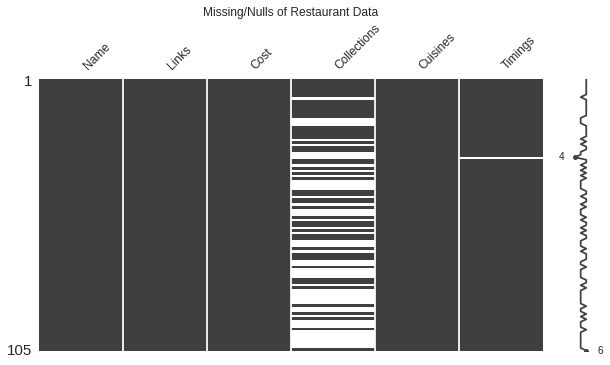

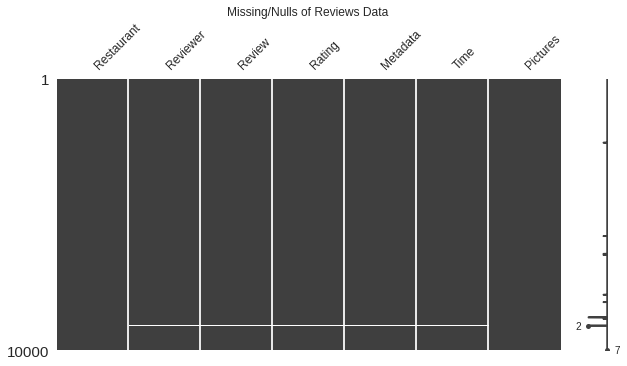

In [ ]:
# Visualize Null/Missing values

import missingno # library to visualize nulls

missingno.matrix(df,figsize=(10,5), fontsize=12);
plt.title('Missing/Nulls of Restaurant Data')

print('\n')

missingno.matrix(df_reviews,figsize=(10,5), fontsize=12);
plt.title('Missing/Nulls of Reviews Data')
 

### What did you know about your dataset?

**Restaurent Data**
* We have limited number of rows and features in this dataset.
* dtype of 'Cost' should be integer, but its showing object, needs some treatment.
* 'Timing' feature has to be specific working hours of restaurant but here its unstructured.
* It has no duplicate values
* 'Timing' column has a null and 'Collection' feature has 51% of Null values.

**Reviews Data**
* 1000 rows and 7 features presented in this data.
* except 'Restaurent' and 'Pictures', every feature has some nulls.
* 'Rating' dtype has to be int, but its showing object.
* 36 values are duplicated in this data, and mostly duplicates have null values
* 'Timing' feature should be datetime but its showing object.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Restaurant data columns:- {list(df.columns)}\n')
print(f'Review data columns:- {list(df_reviews.columns)}')

Restaurant data columns:- ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

Review data columns:- ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [ ]:
# Dataset Describe for Restaurant data
df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# Dataset Describe for Reviews data
df_reviews.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description 

**Restaurant Data**

* Name : Name of Restaurants

* Links : Web Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Reviews Data**

* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print('No. of Unique values in Restaurant Data')
print(df.nunique(), '\n')

print('No. of Unique values in Reviews Data')
print(df_reviews.nunique())

No. of Unique values in Restaurant Data
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64 

No. of Unique values in Reviews Data
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

####  --- For Restaurant Data -

In [ ]:
# Write your code to make your dataset analysis ready.

# converting "Cost" dtype from object to integert by removing 'comma'
df.loc[:,'Cost'] = pd.to_numeric(df.loc[:,'Cost'].str.replace(',',''))


#1 Getting location of restaurant
df['Location'] = df['Links'].apply(lambda x: x.split('/')[3])  #getting location from web link presented in third position of index after split

In [ ]:
df['Location'].value_counts()

hyderabad             104
thetiltbarrepublic      1
Name: Location, dtype: int64

In [ ]:
# extracting unique cuisines and its occurances in dictionary 

cuisine_list=df.Cuisines.str.split(', ') # seperating cuisines for each restaurants
cuis={}
for i in cuisine_list:                  # Iterating thorugh each row 
    for j in i:                         # Iterating through each cuising in the row     
        if (j in cuis):                 # adding occurances
            cuis[j]+=1
        else:
            cuis[j]=1

# converting the occurance dictionary into dataframe
cuis_df=pd.DataFrame(cuis.values(), index=cuis.keys(),
                     columns={'Counts of Restaurants'})

# sorting values by occurances 
cuis_df.sort_values(by='Counts of Restaurants',ascending=False, inplace=True)

#### --- For Reviews Data

In [ ]:
# Review has a string value, lets check it if we can find any meaning from this.
df_reviews.loc[df_reviews['Rating'] == 'Like']['Review'][7601]

'One of the best pizzas to try. It served with the fresh crust and the topping of veggies are fresh and the taste of the ingredients was awesome and it is fully overloaded with Cheese. I would like to recommend to try every Time I wager for pizza'

With help of common sense, we able to figure out that the highest probability rating shoud be between 4 or 5, so we can take average value as 4.5

In [ ]:
# --Preparation for EDA (Reviews Data)--

# storing default mode of warnings
# chained_assignment = pd.options.mode.chained_assignment
# Set the chained assignment setting to None to suppress the warning
pd.options.mode.chained_assignment = None


# as per null value visualization and counts, some values are totally null in all features and have no information that affect analysis so we drop it
df_reviews = df_reviews.dropna(subset=['Time'], how='all')

# invalid entry of 'like' in reviews convert to number
df_reviews.loc[df_reviews['Rating'] == 'Like', 'Rating'] = 4.5

# converting datatype from 'object' to 'numeric' 
df_reviews['Rating'] = pd.to_numeric(df_reviews['Rating'])

# seperating reviews and folowers from metadata
df_reviews[['Reviews_given', 'Followers']] = df_reviews['Metadata'].str.split(',', expand=True)
df_reviews['Reviews_given'] = pd.to_numeric(df_reviews['Reviews_given'].str.split(' ').str[0])
df_reviews['Followers'] = pd.to_numeric(df_reviews['Followers'].str.split(' ').str[1])

# Some of reviewers has 0 followers but its showing as Nulls, we can fill them with 0
df_reviews['Followers'].fillna(0, inplace=True)

# converting time from object to datetime 
df_reviews['Time'] = pd.to_datetime(df_reviews['Time'])

# convert time of day into categories like noon evening morning etc.
boundaries=[0,4,8,12,16,20,24]
labels=['early_morning','morning','post_morning','noon','evening','night']
df_reviews['Time_of_day']=pd.cut(df_reviews['Time'].dt.hour,
                              bins=boundaries,
                              labels=labels,
                              include_lowest=True)


#create a new column to store week of month
df_reviews['Week_of_month'] = (df_reviews.Time.dt.day/7
                               ).apply(lambda x: math.ceil(x))

# we have extracted value from "Metadata", we can drop it. 
df_reviews = df_reviews.drop(columns='Metadata')


# Set the chained assignment setting back to its original value
# pd.options.mode.chained_assignment = chained_assignment

Merging both Dataframes

In [ ]:
# making similar names of both data to merge on
df_reviews1 = df_reviews.rename(columns={'Restaurant':'Name'})

merge_df = pd.merge(df, df_reviews1, on='Name', how='right') # merging both df on restaurant name column

merge_df.dropna(axis=0, subset=['Review'], inplace= True)  #dropping Nulls of Review column

# adding number of cuisines
merge_df['no_of_cuisines'] = merge_df['Cuisines'].apply(
                                      lambda x: len(x.split(', '))
                                      )
# adding number of words in review provided by critic
merge_df['len_of_review'] = merge_df.Review.apply(lambda x: len(x.split()))

Preparation for total reviews, followers, pictures based on year

In [ ]:
# calculating year wise total reviews given
review_follow_1=df_reviews.groupby(pd.DatetimeIndex(df_reviews['Time']).year
                                   ).apply(lambda x:np.sum(x['Reviews_given'])
                                   ).reset_index(name='Total Reviews')

# year wise total followers
review_follow_2 = df_reviews.groupby(pd.DatetimeIndex(df_reviews['Time']).year
                                     ).apply(lambda x:np.max(x['Followers'])
                                     ).reset_index(name='Total Followers')

# year wise total pictures uploaded
pictures =df_reviews.groupby(pd.DatetimeIndex(df_reviews['Time']).year
                             ).apply(lambda x:np.sum(x['Pictures'])
                             ).reset_index(name='Total Pictures')

# merging all above data
review_follow=pd.merge(review_follow_1,review_follow_2, 
                       how='inner',left_on='Time',right_on='Time')

review_follow=pd.merge(review_follow, pictures, how='inner',
                       left_on='Time',right_on='Time').rename(columns={'Time':'Year'}) # finally merged all 3 data into one

In [ ]:
df.head(4)

,Name,Links,Cost,Collections,Cuisines,Timings,Location
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",hyderabad
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,hyderabad
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",hyderabad
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,hyderabad


In [ ]:
df_reviews.head(4)

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews_given,Followers,Time_of_day,Week_of_month
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,noon,4
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,noon,4
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,night,4
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,night,4


### What all manipulations have you done and insights you found?

I have to change data types of columns to their respective adantage, so that it will add value in our analysis, some value in feature are different from others so replace that with basic logic and extracted relevant information from 'Metadata' also extracted the city of restaurents from URL's provided, Added some columns like "length of reviews" and "number of cuisines".

**Insights:-**
* Almost every city is hydrabad, so its a specific dataset of hydrabad restaurants
* Duplicates in reviews data are just Null values, hence removing nulls also remove duplicates
* There is a variation in reviews length, as some has more words and some has less, will see how it impacts ratings ,
* Maximun 6 cuisines presented in a restaurant.
* Extracted the numbers of followers and Review given.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Distribution of Numerical features of both data

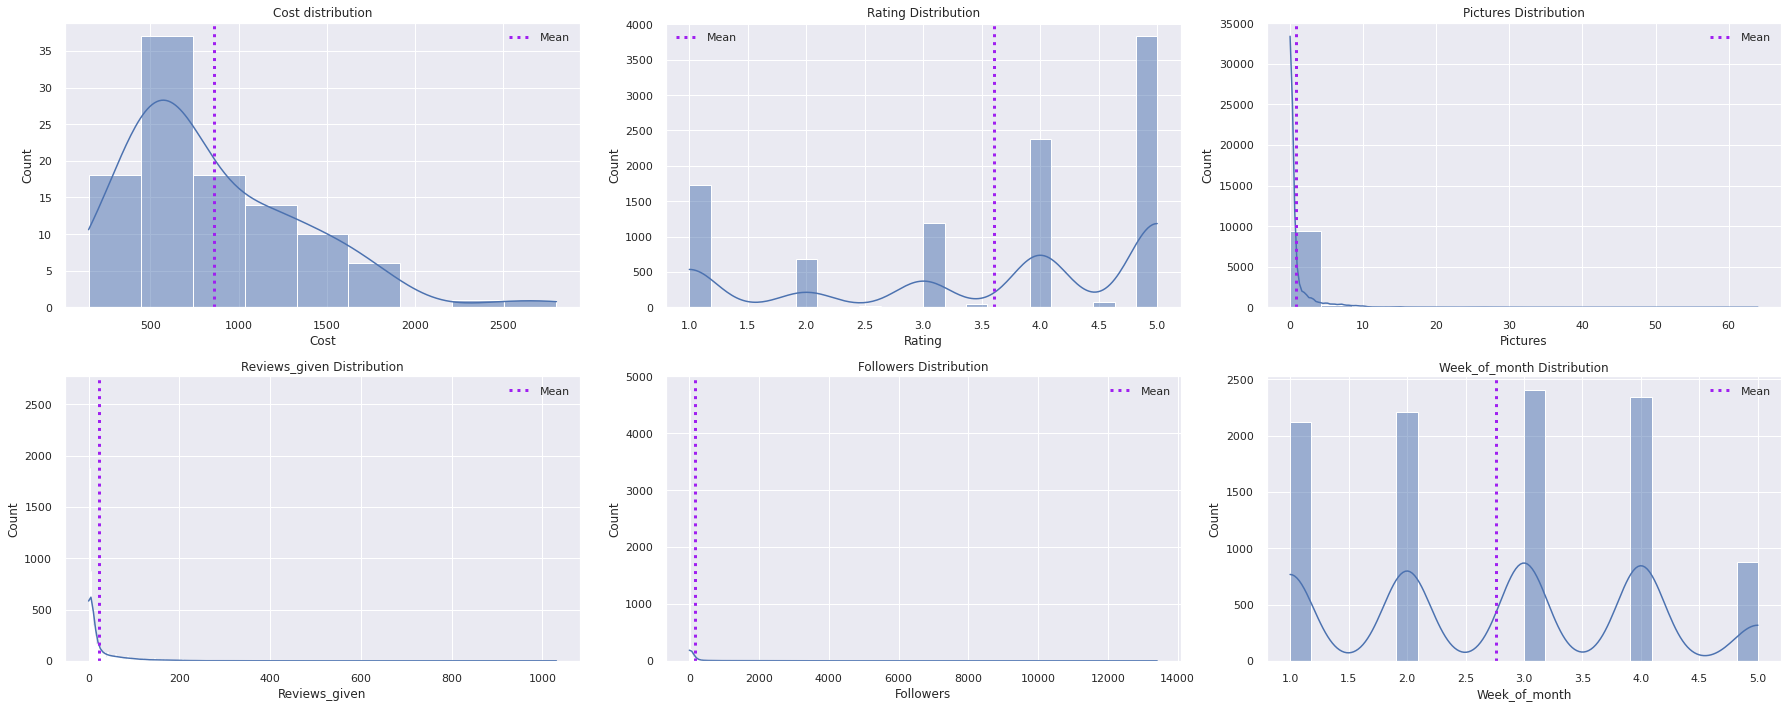

In [ ]:
# Chart - 1 visualization code

sns.set(rc={'figure.figsize':(25,10)}) # setting size


# plotting numerical features of Ratings data
figure, axis = plt.subplots(2, 3)  #creating subplots

sns.histplot(df['Cost'], kde=True, palette="crest",    # creating histplot of cost distribution 
             fill=True, linewidth=1, ax=axis[0,0])

axis[0,0].axvline(df['Cost'].mean(), color='#A020F0',   # adding mean line to plot  
                  linestyle='dotted', linewidth=3,
                  label= 'Mean')

axis[0,0].set_title('Cost distribution')  # setting title
axis[0,0].legend()

# plotting numerical features of Review data
for indx, name in enumerate(df_reviews.describe().columns): 
    plt.subplot(2,3,indx+2) 

    sns.histplot(df_reviews[name], kde=True, palette="crest",    # creating histplot of features distribution 
                fill=True, linewidth=1).set(title=f'{name} Distribution')

    plt.axvline(df_reviews[name].mean(), color='#A020F0',   # adding mean line to plot  
                      linestyle='dotted', linewidth=3,
                      label= 'Mean')
    plt.legend()

plt.tight_layout()


##### 1. Why did you pick the specific chart?

Seaborn Histplot is useful to visualise the spread of features and its distribution frequencies.

##### 2. What is/are the insight(s) found from the chart?

* The most popular estimated cost of dining is Rs 500 to 800, few restaurants are very expensive with more than Rs 2000 cost.
* Overall positive ratings are higher than low (negative) ratings and Custmers prefer to give rating on discrete numbers.
* Pictures with reviews are not common and most of people didn't provide any  image or only provide single image.
* Majority of critics has given between 0 to 100 reviews and very few given more than 200
* As expected followers of critics are also mostly 0 or less than 20.
* no biasness in the week of months when review posted, as all 4 weeks shares similar patterns. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here we study the skewness, spread and distribution of the data to understand it visually and this will be a base to further the proces of univariate analysis, as per the business impact, cost plays a huge role in country like india and here we get glimpse of popular cost and we can get more insights following through the features. 

#### Chart - 2 - Popular Cuisines

Text(0.5, 1.0, 'Cuisines at Restaurants in Hyderabad (in order of Popularity)')

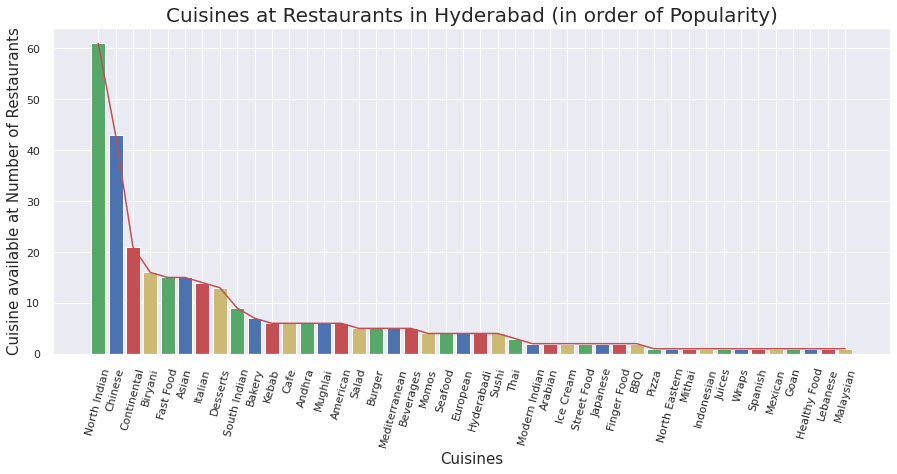

In [ ]:
# Chart - 2 visualization code

plt.figure(figsize=(15,6)) #setting size

plt.plot(cuis_df.index,cuis_df['Counts of Restaurants'],color='r') #plottig line 
plt.bar(cuis_df.index,cuis_df['Counts of Restaurants'],color=['g','b','r','y']) # plotting bar graph
plt.xlabel('Cuisines',size=15)
plt.xticks(rotation=75)
plt.ylabel('Cuisine available at Number of Restaurants',size=15)
plt.title('Cuisines at Restaurants in Hyderabad (in order of Popularity)',size=20)

##### 1. Why did you pick the specific chart?

Bar graph helps us to clearly visualize highest 'n', lowest 'n' etc.  

##### 2. What is/are the insight(s) found from the chart?

Despite South indian location, North Indian, Chinese are the two most popular cuisines in Hydrabad and presented in 40+ restaurants, The Famous Hyderabadi Biriyani is attributed as a cuisine in Itself and holds the 4th position, and Healthy food, Lebanese, Malaysian are the least popular in hydrabad as presenmted in only 1 or 2 restaurants, hydrabad has less demand for healthy food etc. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Getting knowledge about the popular cuisines in the city helps restaurants to make better decisions about foods that are popular and that are high demanding, here we see a supply side view of the cuisines, there may be some hidden information presented abound demand by consumers that can be unvealed through further analysis.  

#### Chart - 3 - Popular Zomato Categories in Hydrabad

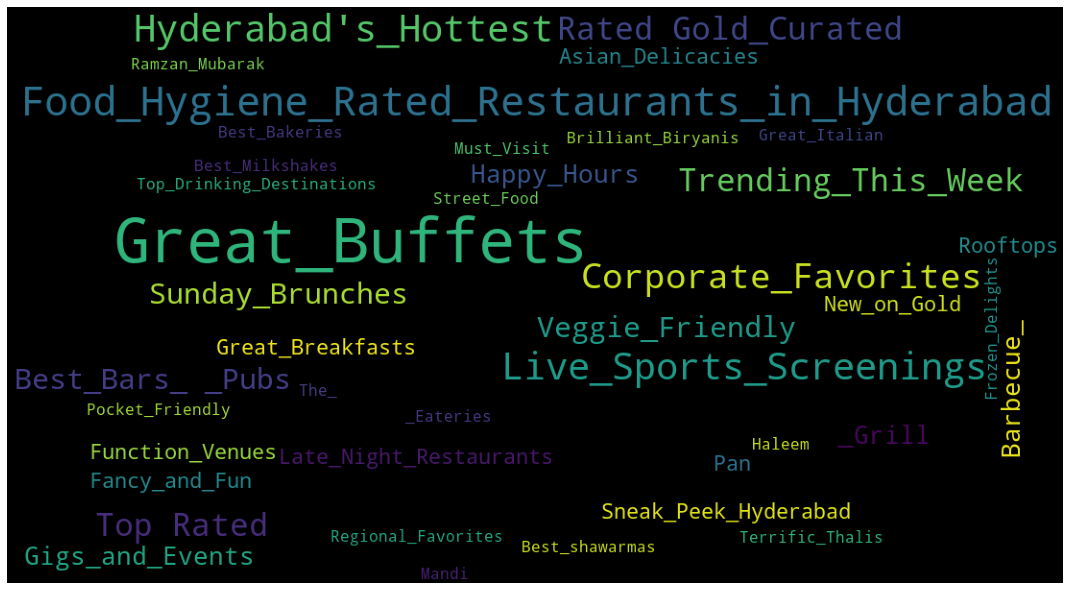

In [ ]:
# Chart - 3 visualization code

colection_withut_null = df.Collections.dropna()

collection_list = colection_withut_null.str.split(', ') # seperating collections for each restaurants

words = ''                  # creating empty string

for i in collection_list:    # iterating through each row
  for j in i:                 # each item in each list
    ls = j.split(' ')         # splitting to see if any space between words to repalce with '_' to join words
    if len(ls) > 1:
      j = '_'.join(ls)

    words += j+' '            # creating a final string of all words presented from collection



# Creating Wordcloud from the text corpus
wordcloud = WordCloud(width = 1100, height = 600, random_state =5,
                      min_font_size = 10).generate(words)



# plot the WordCloud image                      
plt.figure(figsize = (25,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()                

##### 1. Why did you pick the specific chart?

Wordcloud is interesting visualization to know popularity in text data.

##### 2. What is/are the insight(s) found from the chart?

A restaurant has multiple categories and we found Great_buffets and Food_hygiene_rated_restaurants are popular categories and 'brilliant biryanis' are least popular categories., also Drinking destination is also less popular this may indicate the demand for this categoriy items but we can deep dive into this with ratings.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato can study the behaviour from this analysis and compare the popular categories with other cities of same region to analyse the categories better and can formulate plan to propose ideas of adding more categories by restaurants.

#### Chart - 4 - High and Low rated restaurants

In [ ]:
#grouping with names on avg rating and cost
merge_grupby = merge_df.groupby('Name').agg({'Cost':'mean', 'Rating':'mean'}).reset_index()
low_rated = merge_grupby.sort_values('Rating', ascending=True)[:10] # top 10 low rated restaurants from our avg ratings df
high_rated = merge_grupby.sort_values('Rating', ascending=False)[:10] # top 10 high rated restaurants from our avg ratings df

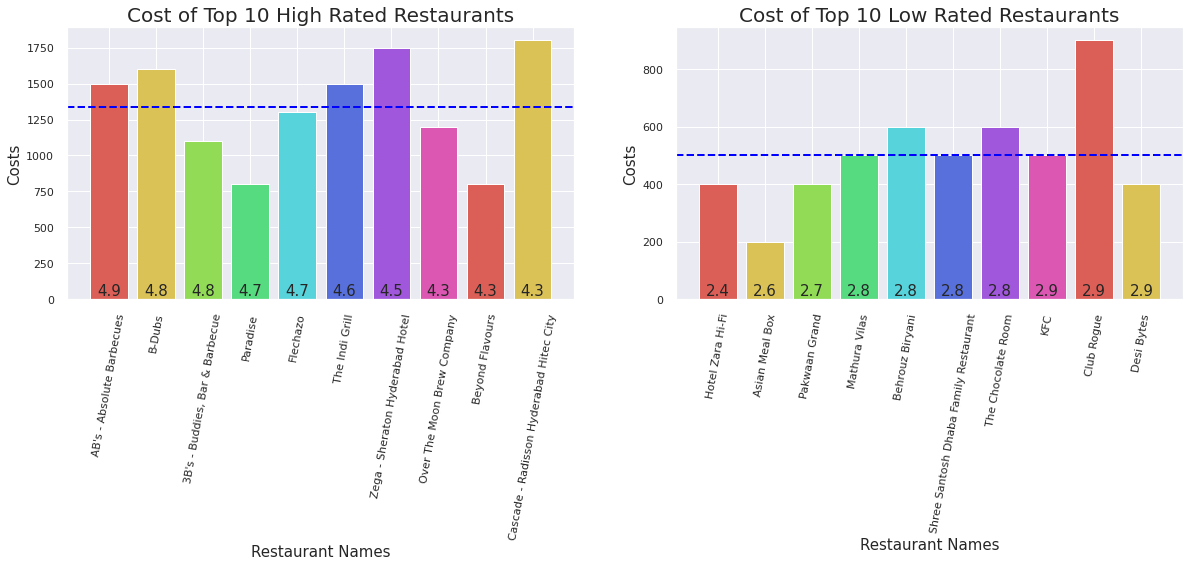

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(20,5))  # setting size

# plotting for the first axis
plt.subplot(1,2,2)
plt.bar(low_rated['Name'], low_rated['Cost'], 
        color = sns.color_palette("hls", 8))

plt.axhline(low_rated['Cost'].mean(), color='blue',     # adding a horizontal mean line
            linestyle='--', linewidth=2)
# adding ratings on the bargraph
for index,data in enumerate(low_rated['Rating']):
    plt.text(x=index , y =data+1 , s=f"{round(data,1)}", 
             va='bottom', ha='center', fontdict=dict(fontsize=15))

# adding title, labels etc
plt.xticks(rotation=80)
plt.title('Cost of Top 10 Low Rated Restaurants',size=20)
plt.xlabel('Restaurant Names',size=15)
plt.ylabel('Costs',size=15)


# plotting for second axis
plt.subplot(1,2,1)
plt.bar(high_rated['Name'], high_rated['Cost'], 
        color = sns.color_palette("hls", 8))

plt.axhline(high_rated['Cost'].mean(),                   # adding a horizontal mean line
            color='blue',linestyle='--', linewidth=2)

for index,data in enumerate(high_rated['Rating']):
    plt.text(x=index , y =data+1 , s=f"{round(data,1)}", 
             va='bottom', ha='center', fontdict=dict(fontsize=15))

# adding title, labels etc
plt.xticks(rotation=80)
plt.title('Cost of Top 10 High Rated Restaurants',size=20)
plt.xlabel('Restaurant Names',size=15)
plt.ylabel('Costs',size=15)

plt.show()

##### 1. Why did you pick the specific chart?

Bar charts helps to visulaize top 'n' value for categorical data. 

##### 2. What is/are the insight(s) found from the chart?

* We can observe a slight pattern that Highest rated restaurants has higher costs also with average cost for them is 1300 and for lowest rated restaurant cost is on lower side with averge of 500.

* "AB's Absaolute Barbecues" is the Highest average rated restaurant in this data and "Hotel Zara Hi-fi" is the lowest rated restaunant in this data, and "KFC" the popular fast food franchiese is rated low overall.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Cost and rating seems to be related here but, its not the case always that only costiler restaurants has higher ratings, there are several restasurants with less price and has good ratings, these situation is also seen as costilier restaurants may provide some additional benefits for higher ratings, but with more data we can help them to improve with strategies etc.  

#### Chart - 5 - Popular Critics/Reviewers

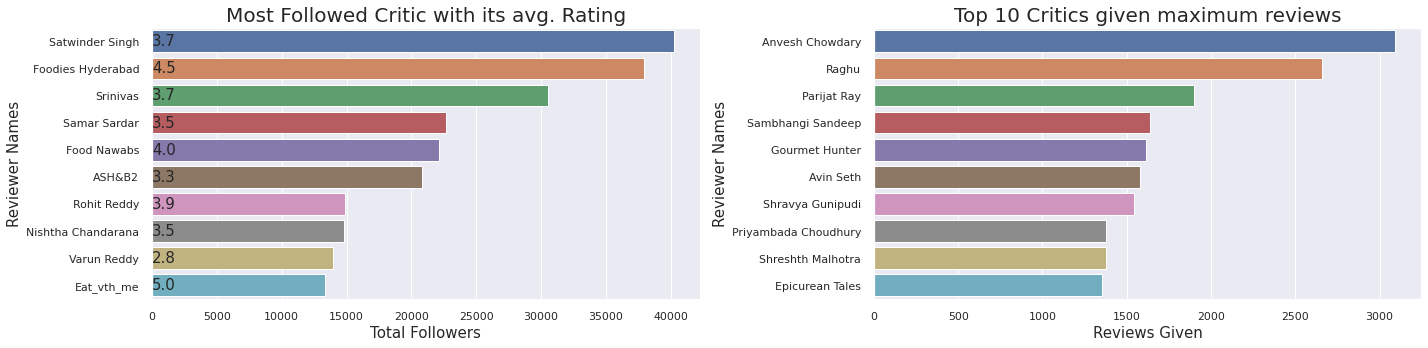

In [ ]:
# Chart - 5 visualization code

# getting total followers and reviews given for each critic
rev = df_reviews.groupby('Reviewer').agg({'Rating':'mean', 'Reviews_given':'sum', 
                                          'Followers':'sum'}).reset_index()

most_follow = rev.sort_values('Followers', ascending=False)[:10]
most_reviews = rev.sort_values('Reviews_given', ascending=False)[:10]


plt.figure(figsize=(20,5))  # setting size

# plotting for the first axis
plt.subplot(1,2,1)
sns.barplot(x=most_follow['Followers'], y=most_follow['Reviewer'])

# adding ratings on the bargraph
for index,data in enumerate(most_follow['Rating']):
    plt.text(x=data+1 , y = index, s=f"{round(data,1)}", 
             va='center', ha='left', fontdict=dict(fontsize=15))

# adding title, labels etc
plt.title('Most Followed Critic with its avg. Rating',size=20)
plt.xlabel('Total Followers',size=15)
plt.ylabel('Reviewer Names',size=15)

# plotting for second axis
plt.subplot(1,2,2)
sns.barplot(x=most_reviews['Reviews_given'], y=most_reviews['Reviewer'])

# adding title, labels etc
plt.title('Top 10 Critics given maximum reviews',size=20)
plt.xlabel('Reviews Given',size=15)
plt.ylabel('Reviewer Names',size=15)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph is best to use in this situation where we visualise top n values. 

##### 2. What is/are the insight(s) found from the chart?

* "Satwinder Singh" is most Popular critic in this data followed by "Foodies Hydrabad" with more than 35000 followers.
* Majority of critics in this data has under 15000 followers.
* Highest reviews given by "Avnesh Chowdary" followed by "Raghu" as more than 2500 reviews
* majority of critics has given under 1500 reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

"Varun Reddy" has lowest average rating of 2.8 despite being top 10 popular, meaning he is a negetive reviewer, this kind of data is necessary for restaurants to made necessary adjustments in their strategy to increase ratings.

#### Chart - 6 - Reviews proportion with Time and month

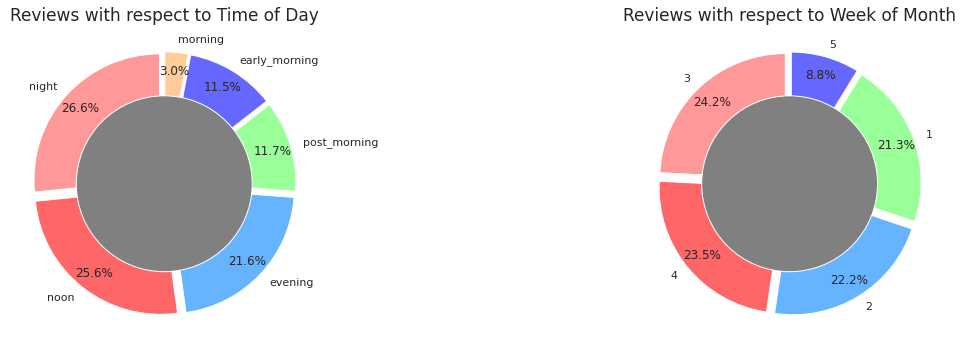

In [ ]:
val = df_reviews.Time_of_day.value_counts().values # values of chart
label =  df_reviews.Time_of_day.value_counts().index # labels of chart

# Chart - 5 visualization code
plt.figure(figsize=(20,5)) # setting size
# plot 1
plt.subplot(1,2,1)

colors = ['#ff9999','#ff6667', '#66b3ff','#99ff99', '#6667ff', '#ffcc99'] #colors

explode = (0.05,0.05,0.05,0.05,0.05,0.05) #explsion
plt.pie(val, colors = colors, labels=label, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='grey')  #draw circle inside
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
fig.patch.set_facecolor('white')  # color of inner circle
plt.title('Reviews with respect to Time of Day', fontsize = 17)

# plot 2
plt.subplot(1,2,2)
val_week = df_reviews.Week_of_month.value_counts().values # values of chart
label_week =  df_reviews.Week_of_month.value_counts().index # labels of chart


explode = (0.05,0.05,0.05,0.05,0.05) #explsion
plt.pie(val_week, colors = colors, labels=label_week, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='grey')  #draw circle inside
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
fig.patch.set_facecolor('white')  # color of inner circle
plt.title('Reviews with respect to Week of Month', fontsize = 17)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

When there is categorical data to be visualise to see the percentage of area it accuired in total data, then pie charts are best to visualize this as it gives us the idea of what percentage each piece has taken.

##### 2. What is/are the insight(s) found from the chart?

* Critics provides most reviews at noon, evening and night time and there are few which gives reviews early morning. 
* Weeks number doesn't really makes any impact to reviews. they can be leaved as it is.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Not as much impact to business with this analysis but, now we have the idea about timing of reviews from critics and we can alter our push notification strategy to remind critics to review on given popular timings.

#### Chart - 7 - Total Reviews, Followers and pictures of critics based on Year 

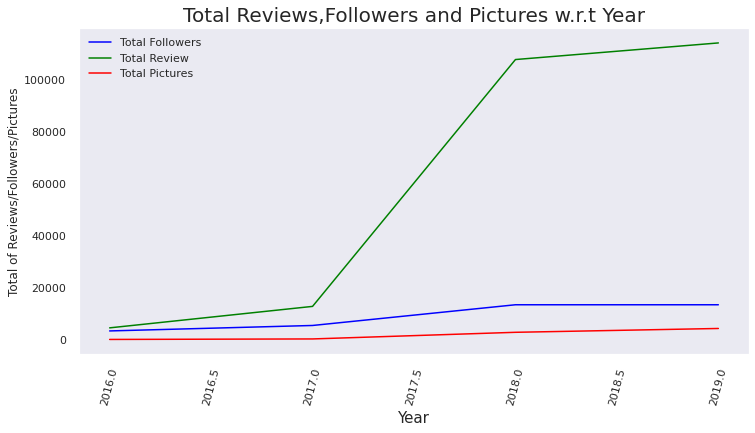

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(12,6))
plt.plot(review_follow['Year'],review_follow['Total Followers'], color = 'blue') # plotting total followers in given year
plt.plot(review_follow['Year'],review_follow['Total Reviews'], color = "green") # plotting total reviews in given year
plt.plot(review_follow['Year'],review_follow['Total Pictures'], color = "red") # plotting total pictures in given year
# assigning titles and labels
plt.xlabel('Year',size=15)
plt.xticks(rotation=75)
plt.grid()
plt.ylabel('Total of Reviews/Followers/Pictures',size=12)
plt.title('Total Reviews,Followers and Pictures w.r.t Year',size=20)
plt.legend(['Total Followers','Total Review', 'Total Pictures'])

##### 1. Why did you pick the specific chart?

Year on Year visualization is like a tredn visualization which is best when we use line chart, to process clear image of the changes in each given year.

##### 2. What is/are the insight(s) found from the chart?

* Number of reviews increased at exponential rate, this maybe due to benefits zomato provides when any critic post a review.
* We observed critics followers are increasing it resembles that users trusts critics and critics started playing major role in influencing the users decision.
* Trend of uploading pictures is not so popular amongst critics and there could be various data that affect this decision. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In this plot We observed a positive rate of change and increaased role and influence of critics that affect users decision and this ratings will benefit the restaurants to work effectively because ratings directly impact on restaurant's orders, also for pictures we may intorduce points for uploading images etc.   

#### Chart - 8 - Cost vs Rating

Text(0.5, 1.0, 'Relation between Rating & Cost of Restaurant')

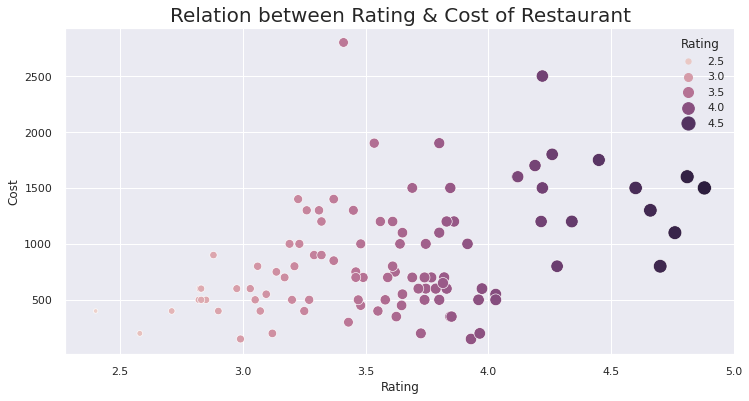

In [ ]:
# Chart - 8 visualization code

plt.figure(figsize=(12,6)) # setting size
# plotting scatter plt shwoing relation between 2 features
sns.scatterplot(data=merge_grupby, x='Rating', 
                y='Cost', size='Rating', 
                sizes=(20, 200), hue="Rating")

plt.title('Relation between Rating & Cost of Restaurant', size=20)

##### 1. Why did you pick the specific chart?

Scatterplot is best to use when we need to define Dependence or independence of 2 variables or need to know any relationship between variables. 

##### 2. What is/are the insight(s) found from the chart?

In this data less than 3.0 ratings are only for low cost restaurants and higher ratings are only for restaurants costs more than 800, this looks like a relation between cost and ratings. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It looks like hydrabad's restaurants is sensitive to their price, as we see a pattern of low rating in low cost restaurants, there can be quality issues with the low cost restaurants moreover we have only a sample of restaurants, however given the rich nature of city, it looks logicaly correct, so this report helps restaurants to wiork on their price points and make more strategic decision. 

#### Chart - 9 - Ratings Distribution of cuisines

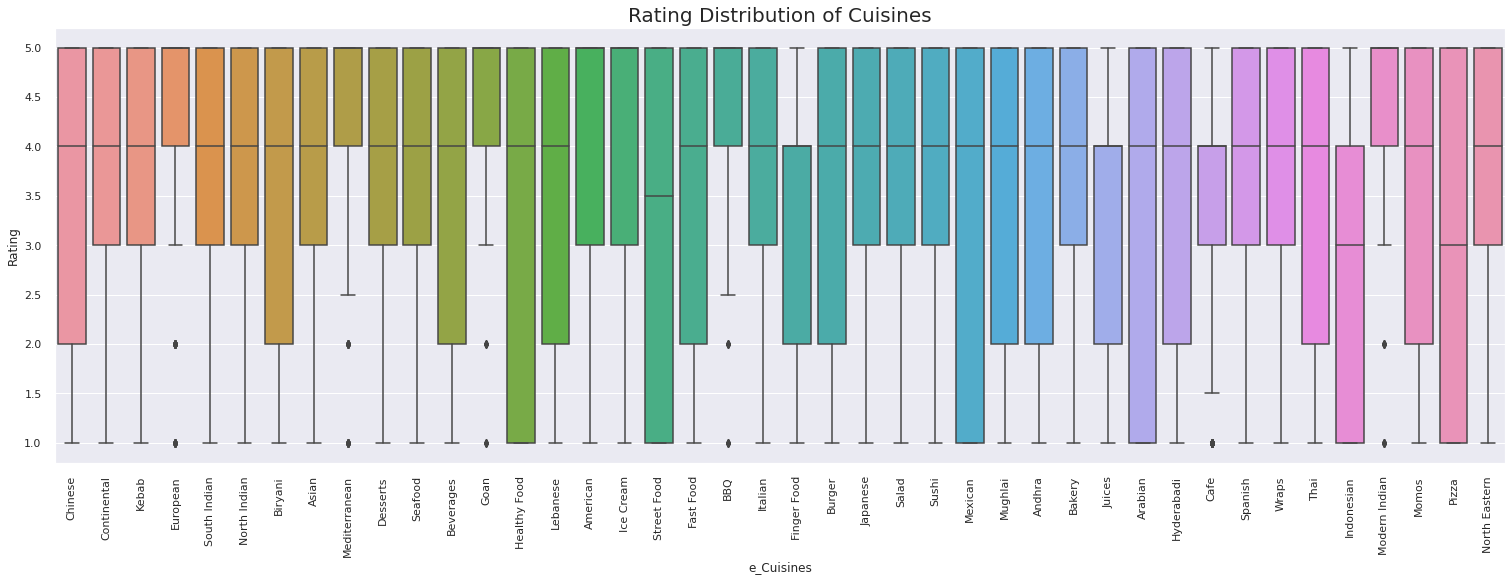

In [ ]:
# Chart - 9 visualization code

# splitting cuisines
merge_df['e_Cuisines'] = merge_df['Cuisines'].apply(lambda x: x.split(', '))
emdf = merge_df.explode('e_Cuisines') # exploding by cuisines for boxplot

plt.figure(figsize=(26,8))
sns.boxplot(data=emdf, x='e_Cuisines', y='Rating')
plt.xticks(rotation=90)
plt.title('Rating Distribution of Cuisines', size=20)

plt.show()

##### 1. Why did you pick the specific chart?

Using Boxplots for visualising percentiles of data belong to particular area, and getting idea about distribution of y value for given particular x value 

##### 2. What is/are the insight(s) found from the chart?

* There are no cuisines which are very bad or rated very low multiple times, and but there are some cuisines which are only rated high almost every time like 'European', 'Mediterranian', 'Goan', 'BBQ' etc.
* 'Indonasian' is majorly low rated meaning only few restaurants made it upto mark.
* Overall the cuisines are more or less on a positive note for restaurants.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information is really helpful to the restaurant owners to examine each and every cuisine they offer with its respective rating and maybe it needs some kind of taste change etc, moreover without taking any actions, they can lead towards a negetive growth because, a cusine which was not liked by customer may become reason for its churn even though they have different better taste options.   

#### Chart - 10 - Correlation Heatmap

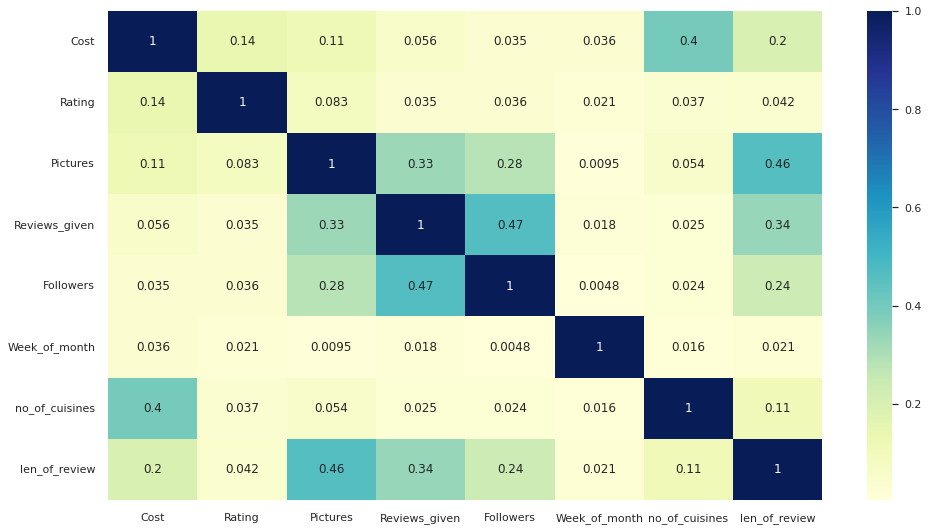

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,9)) # setting size

# plotting correlation heatmap
dataplot = sns.heatmap(abs(merge_df.corr()), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap is very useful for analysing correlation strength of multiple variables and its gives us the power of visualising strength of relation by colors darker colors tends to more relative and lighter are less relative. 

##### 2. What is/are the insight(s) found from the chart?

* Cuisines are slightly related with cost, it seems like when number of cuisines are more, then cost increased.
* When review written was long it was more probabile to have pictures.
* Followers increase when number of reviews given by critic is more and that was quite reasonable as more content more followers.

#### Chart - 11 - Pair Plot 

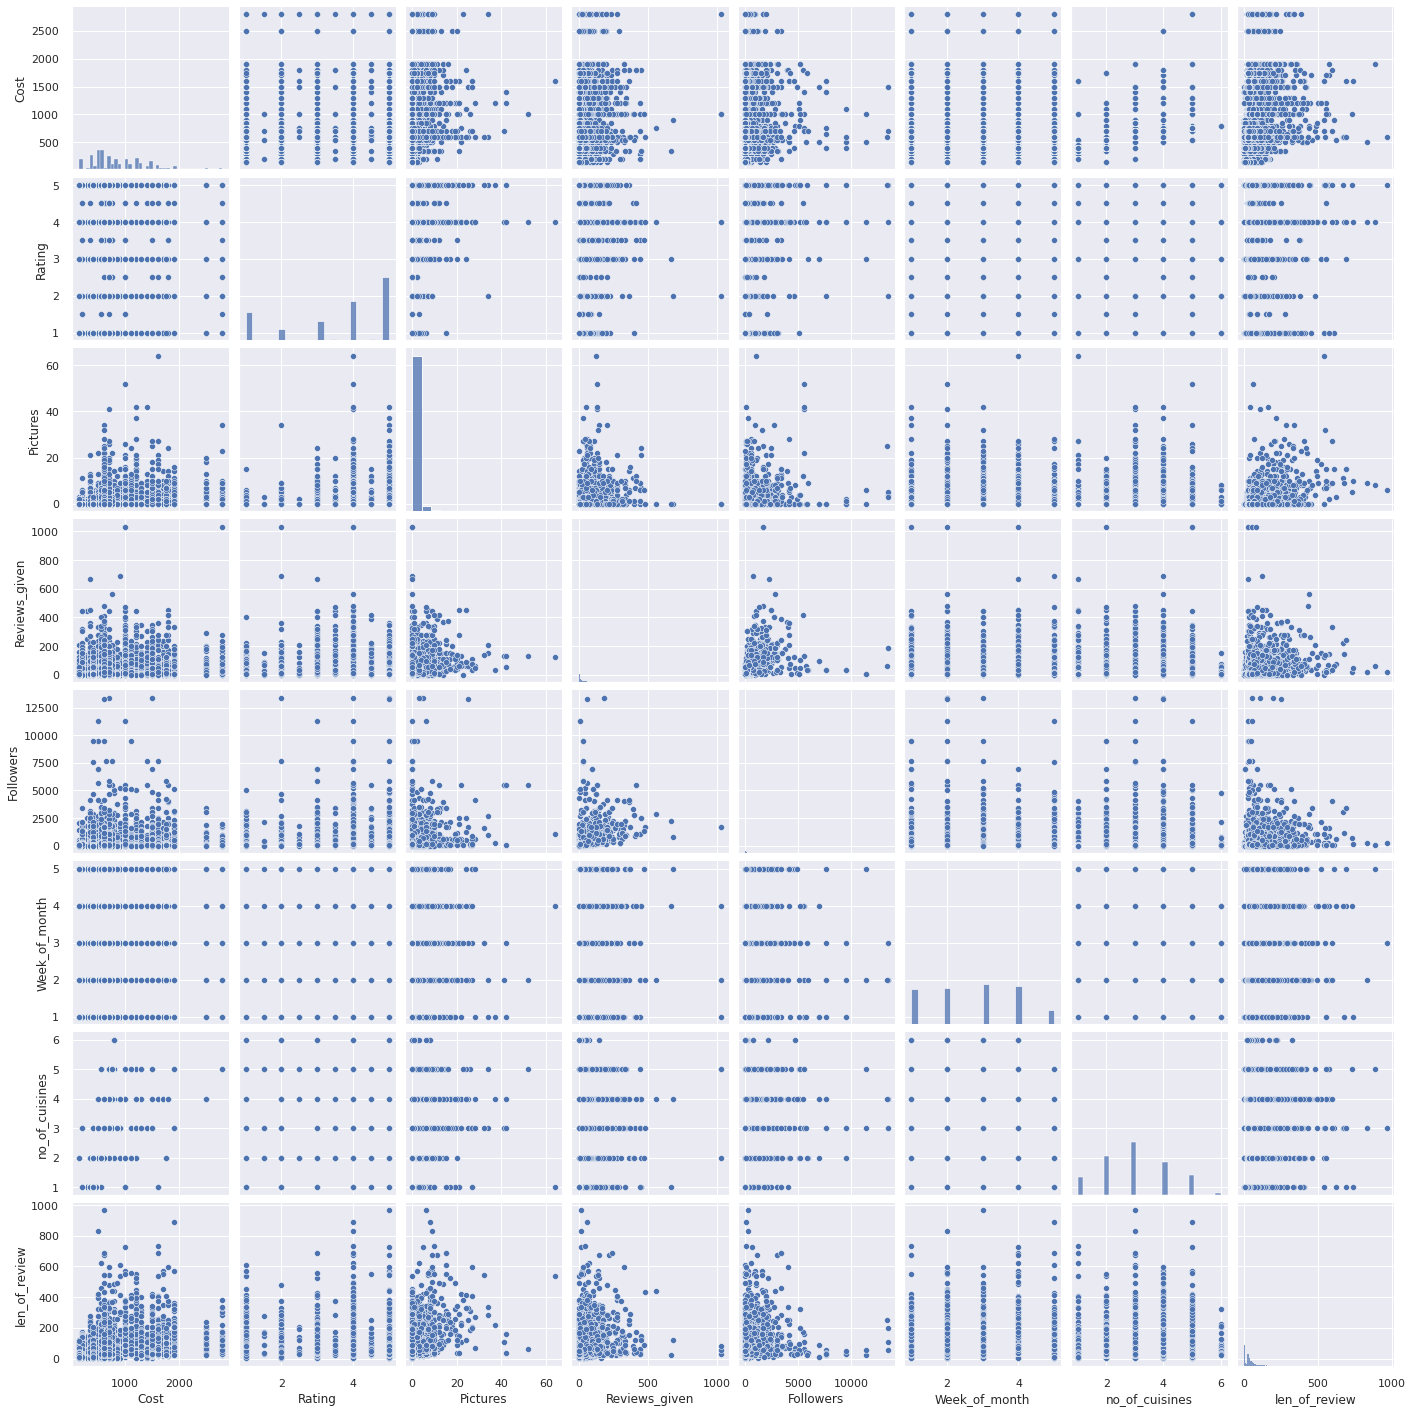

In [ ]:
# Pair Plot visualization code

sns.pairplot(merge_df)

##### 1. Why did you pick the specific chart?

Pairplots helps us to graphically visualise linear relations or any kind of relations or dependencies of one variable to each other varibale in single plot for every numerical features avaiable in data. 

##### 2. What is/are the insight(s) found from the chart?

Thers is not much of hard relations or linear relation between any features still there are some sort of slight changes when one varibalbe changes takes place like in 'Followers', 'Len_of_reviews', 'Reviews_given', or 'pictures' etc. 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis_1: Restaurants that serve a larger number of cuisines have a higher cost per person than those that serve fewer cuisines.

Hypothesis_2: Restaurants with a higher cost per person will have higher ratings than those with a lower cost per person.

Hypothesis_3: The length of reviews written by critics is positively correlated with their rating.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no significant difference in the mean cost among restaurants serving different numbers of cuisines.
* Alternate Hypothesis: There is difference in cost among different numbers of cuisines.
* Test: One-way ANNOVA

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Log-transform the cost data
merge_df['log_cost'] = np.log(merge_df['Cost'])

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(merge_df[merge_df['no_of_cuisines'] <= 2]['log_cost'],
                                      merge_df[merge_df['no_of_cuisines'] <= 4]['log_cost'],
                                      merge_df[merge_df['no_of_cuisines'] > 4]['log_cost'])

alpha = 0.05 # the significance value

if p_value < alpha:
  print(f'We reject Null hypothesis, its statistically significant that cost vary according to no_of_cuisines offered.')

else:
  print('We fail to Reject Null Hypothesis, there is no significant difference in costs according to no_of_cuisines offered.')  

We reject Null hypothesis, its statistically significant that cost vary according to no_of_cuisines offered.


##### Which statistical test have you done to obtain P-Value?

We used One-way Annova test

##### Why did you choose the specific statistical test?

we divided our values in 3 categories, since we cant use T-Test here as it works for 2 groups, we choose to go for one-way Anonova Test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no significant Correlation between Cost and Rating.
* Alternate Hypothesis: There is Significant Correlation between Cost and Rating
* Test: Spearman correlation 

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Calculate the Spearman correlation coefficient and p-value
rho, p_value = stats.spearmanr(merge_df['Cost'], merge_df['Rating'])

# Print the p-value
print('p-value:', p_value)

# Test the correlation
alpha = 0.05
if p_value < alpha:
    print('We Reject Null Hypothesis, The correlation is statistically significant')
else:
    print('We Fail to Reject Null Hypothesis, The correlation is not statistically significant')    


p-value: 3.757298747816136e-43
We Reject Null Hypothesis, The correlation is statistically significant


##### Which statistical test have you done to obtain P-Value?

We used Spearman's Correlation for the test.

##### Why did you choose the specific statistical test?

Since we have an idea that these two doesn't look linearly correlated, so spearman correlation helps us to see whether the two variables covary; whether, as one variable increases, the other variable tends to increase or decrease.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: Length of Review has no correlation with Rating
* Alternate Hypothesis: There is Significant Correlation between length of review and rating
* Test: Linear Regression

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

import statsmodels.formula.api as smf

# Fit a linear regression model to the data
model = smf.ols(formula='Rating ~ len_of_review', data = merge_df).fit()

# Test the correlation
p_val = model.pvalues[1]
alpha = 0.05
if p_val < alpha:
    print('There is a significant correlation between review length and rating')
else:
    print('There is not a significant correlation between review length and rating')


There is a significant correlation between review length and rating


##### Which statistical test have you done to obtain P-Value?

Here we used Linear Regression test to obtain pvalue

##### Why did you choose the specific statistical test?

Here we have to test on positive impact of one variable to another, so we decided to choose linear test. alternatively we can also perform spearman's correlation for the same.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Observing Missing values after changes we made in the EDA part
# For Restaurant Data

print('For Restaurant Data\n') 
print(df.isnull().sum()[df.isnull().sum() > 0])
print('-'*40,'\n')

# For reviews
print('For Reviews Data\n') 
print(df_reviews.isnull().sum()[df_reviews.isnull().sum() > 0])
print('-'*40, '\n')

# percent of nulls for a feature
null_prcnt = (df.Collections.isnull().sum() / len(df.Collections)) * 100
print(f'Collections feature has {round(null_prcnt,2)}% missing values')

For Restaurant Data

Collections    54
Timings         1
dtype: int64
---------------------------------------- 

For Reviews Data

Review    7
dtype: int64
---------------------------------------- 

Collections feature has 51.43% missing values


In [ ]:
# Handling Missing Values & Missing Value Imputation

# filling misssing value of Reviews with empty string
df_reviews.fillna({'Review':''}, inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Primarly there are major missing values in both the data except the 'Collections' feature in restaurants which has 51% percent values of data as nulls so we have to remove it further and 'Timings' is also no use for us so we will be leaving that as it is.  

In Review data, 'Reviews' feature has some missing values that can cause problem in further operations on text data so we filled them with empty strings. all other missing values has been taken care in the EDA process where all values are missing from whole data, so we removed all.

### 2. Handling Outliers

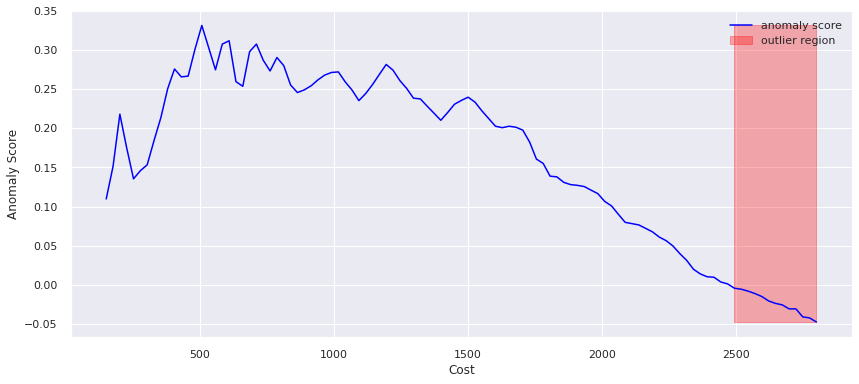

In [ ]:
from sklearn.ensemble import IsolationForest

# Load your DataFrame and select the column with the cost data
cost_col = df["Cost"].values.reshape(-1, 1)

# Create isolation forest object and fit to data
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(cost_col)

# Predict anomalies in data
# df['anomaly'] = isolation_forest.predict(cost_col)

# Visualize anomalies as shaded region
xx = np.linspace(cost_col.min(), cost_col.max(), len(cost_col)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(14, 6)) # setting the size
plt.plot(xx, anomaly_score, label='anomaly score', color='blue')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='red', alpha=0.3, label='outlier region')

plt.legend()
plt.xlabel('Cost')
plt.ylabel('Anomaly Score')
plt.show()


In [ ]:
# Handling Outliers & Outlier treatments

# Calculate the first quartile (Q1)
q1 = df['Cost'].quantile(0.25)

# Calculate the third quartile (Q3)
q3 = df['Cost'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Capping the Cost using IQR technique
# Calculate the lower bound and upper bound
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Replace any values below the lower bound with the lower bound
df.loc[df['Cost'] < lower_bound, 'Cost'] = lower_bound

# Replace any values above the upper bound with the upper bound
df.loc[df['Cost'] > upper_bound, 'Cost'] = upper_bound


##### What all outlier treatment techniques have you used and why did you use those techniques?

There are various neumerical columns in our data but we only require 'Cost' as its the only neumerical feature that is required for clusters of restaurnats. 

At first, we have used Isolation forest algorithm from scikit learn library of to identify anomalies or outliers in our 'Cost' feature, since that outliers are in skewed distribution, we used the IQR technique to cap the outliers with lower and upper bounds using the formula. 

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# getting only necessary features for Clustering
cluster_df = pd.merge(df, merge_grupby, how='right', 
                      on='Name')[['Name', 'Cost_x', 'Rating', 'Cuisines']]

# Encoding the Cuisines as columns to further use in clustering

#splitting cuisines into a list
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x: x.split(', '))

# adding the number of cuisines another feature
cluster_df['no_of_cuisines'] = cluster_df['Cuisines'].apply(lambda x: len(x))


# Create a list of all unique cuisines
all_cuisines = set([cuisine for cuisines in cluster_df['Cuisines'] for cuisine in cuisines])

# Create a DataFrame with a column for each unique cuisine
cuisine_df = pd.DataFrame(columns=all_cuisines)

# Loop over each restaurant and create a feature vector
for i, row in cluster_df.iterrows():
    feature_vec = {cuisine: 0 for cuisine in all_cuisines}
    for cuisine in row['Cuisines']:
        feature_vec[cuisine] += 1
    cuisine_df.loc[i] = feature_vec

# Concatenate the original DataFrame with the cuisine DataFrame
cluster_df = pd.concat([cluster_df, cuisine_df], axis=1)

In [ ]:
# data for Restaurantas cLustering
cluster_df_org = cluster_df.copy()
cluster_df.head(3)

,Name,Cost_x,Rating,Cuisines,no_of_cuisines,American,North Indian,Seafood,Andhra,Pizza,...,Ice Cream,Street Food,Asian,Continental,Arabian,Mughlai,Juices,Bakery,Indonesian,Mediterranean
0,10 Downing Street,1900,3.80,"[North Indian, Chinese, Continental]",3,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,13 Dhaba,450,3.48,[North Indian],1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"3B's - Buddies, Bar & Barbecue",1100,4.76,"[North Indian, Mediterranean, European]",3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here we used technique similar to One Hot Encoding or count vectorization, we have converted cuisines as features and their counts in the values for each restaurants to execute unsupervised clustering in the data.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Storing required features for sentiment analysis seperately from Reviews data

analysis_df = df_reviews[['Restaurant', 'Reviewer', 'Review', 'Rating']]

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
import contractions

# applying fuction for contracting text
analysis_df.loc[:, 'updated_review'] = analysis_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing

analysis_df.loc[:, 'updated_review'] = analysis_df['updated_review'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string

# create a translator for removing punctuation
translator = str.maketrans('', '', string.punctuation)

# remove punctuation
analysis_df['updated_review'] = analysis_df['updated_review'].apply(lambda x: x.translate(translator))

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

# remove URLs
analysis_df['updated_review'] = analysis_df['updated_review'].str.replace(r'http\S+|www.\S+', '', case=False)

# remove words and digits containing digits
analysis_df['updated_review'] = analysis_df['updated_review'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))

# removing Emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

analysis_df['updated_review'] = analysis_df['updated_review'].apply(remove_emojis) #applying the function to remove emjis

<ipython-input-50-96dd0b811b3f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  analysis_df['updated_review'] = analysis_df['updated_review'].str.replace(r'http\S+|www.\S+', '', case=False)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# there can be words which are important in reviews, that may be missed if we use built-in stopwords, so we explicitly given words
stop_words = ['a', 'an', 'and', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he', 'her', 'his', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to', 'was', 'were', 'with']

analysis_df.loc[:,'updated_review'] = analysis_df['updated_review'].apply(lambda x: ' '.join(
                                                            [word for word in x.split() if word.lower() not in stop_words]))

In [ ]:
# Remove White spaces

analysis_df.loc[:,'updated_review'] = analysis_df.loc[:,'updated_review'].str.strip()

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

**Not Required**

We are not using Rephrase text as this will not be much required in this reviews data that needs to be originalfor the best results from our analysis.

#### 7. Tokenization

In [ ]:
# Tokenization
# using NLTK word tokenize 
analysis_df['tokens'] = analysis_df['updated_review'].apply(lambda x: nltk.word_tokenize(x))

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# initialize stemmer and lemmatizer objects
# stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# define a function to apply stemming and lemmatization to tokens
def normalize_tokens(tokens):
    # stem tokens
    # stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# apply the normalize_tokens function to the 'token' column
analysis_df['tokens'] = analysis_df['tokens'].apply(normalize_tokens)

##### Which text normalization technique have you used and why?

In these portion I've two options Stemmig and Lemmatization, Lemmatization is a specific type of text normalization that involves reducing words to their base or root form, known as a lemma. This can help to standardize variations of the same word, such as "walking," "walked," and "walks" all being reduced to "walk."

Lemmatization can be particularly useful for reviews analysis of Zomato because it can improve the accuracy of sentiment analysis and other text analysis techniques. By standardizing words to their base form, lemmatization can help to identify and group together related words, even if they are in different forms, and provide a more comprehensive understanding of the language used in the reviews.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

**Not Required**

POS tagging may not be as useful because reviews tend to use simpler language and there may be less variation in the types of words used compared to other types of text data, such as news articles or academic papers.

Additionally, reviews often contain informal language and colloquialisms, which can make POS tagging more challenging and less reliable. For example, reviews may contain slang or idiomatic expressions that are not easily classified by a POS tagger.

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# initialize the TfidfVectorizer
tfidf = TfidfVectorizer()

# fit and transform the tokenized data
tfidf_matrix = tfidf.fit_transform(analysis_df['tokens'].apply(lambda x: ' '.join(x)))

# convert the matrix to a pandas dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
tfidf_df.iloc[200:204, 40:] #checking our tfidf vectorised data

,abiding,abijit,ability,able,ably,abmiance,abot,about,aboutthat,aboutthe,...,zomto,zone,zoneincrease,zonequality,zoomato,zucchini,zyada,àlacarte,ànd,éclat
200,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.062148,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

I have used TF-IDF vectorizer in this case, because TF-IDF is a popular choice for text vectorization is that it can effectively represent the importance of each word in a text document, allowing for more accurate analysis and modeling. This is particularly useful for applications such as sentiment analysis, topic modeling, and information retrieval.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# ---------For Restaurants Clusters----------

# converting Names into Index
cluster_df.set_index('Name', inplace=True)

# renaming Cost_x to cost
cluster_df.rename(columns={'Cost_x':'Cost'}, inplace=True)



#----------For sentiment analysis---------------

# Create a new column for sentiment based on the ratings
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating >= 3:
        return 'Neutral'
    else:
        return 'Negative'

analysis_df['Sentiment'] = analysis_df['Rating'].apply(classify_sentiment)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# removing cuisines as its already converted to tokenised vectors
cluster_df.drop('Cuisines', axis=1, inplace=True)

# From analysis df, keeping only required features for final input
analysis_df = analysis_df[['Restaurant', 'updated_review', 'Rating', 'Sentiment']]

##### What all feature selection methods have you used  and why?

We are going to use Principal Component Analysis (PCA) for feature selection, in the Clustering problems we have to deal with dimensionalty problem with features.

##### Which all features you found important and why?

for the Restaurant Clustering, we find that 'Cuisines', 'Cost', 'Rating' as important feature to perform clustering. and for the Topic modeling from Reviews data, we have selected reviews text data and converted that to tfidf vectors.   

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

cluster_df['Cost'] = np.log(cluster_df['Cost']) # tranfomed Cost

Transforming features, such as log transforming right-skewed data, is done to improve the performance and interpretability of machine learning models, particularly when dealing with skewed or non-normal data. moreover other numerical features does follow symmetric distribution of data.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Select the numerical variables to standardize
numerical_vars = ['Cost', 'Rating', 'no_of_cuisines']

# Standardize the numerical variables using StandardScaler
scaler = StandardScaler()
cluster_df[numerical_vars] = scaler.fit_transform(cluster_df[numerical_vars])

##### Which method have you used to scale you data and why?

I've used Standard Scaler, these variables have different scales and ranges, which can affect the results of clustering. For example, the cost of a meal can be a much larger number than the rating, and this can cause the clustering algorithm to give more weight to the cost variable in the clustering process.

By standardizing the numerical variables, we put them on the same scale and range, which ensures that each variable contributes equally to the clustering process. This makes the clustering results more reliable and interpretable.

standardizing the numerical variables can help to improve the performance of certain clustering algorithms, such as K-means, which uses Euclidean distance as a similarity metric. 

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, Dimensionality reduction is needed because the countvectorization technique creates neumerious number of features that are used in clustering and to working with huge amount of features impact our performance and resources.

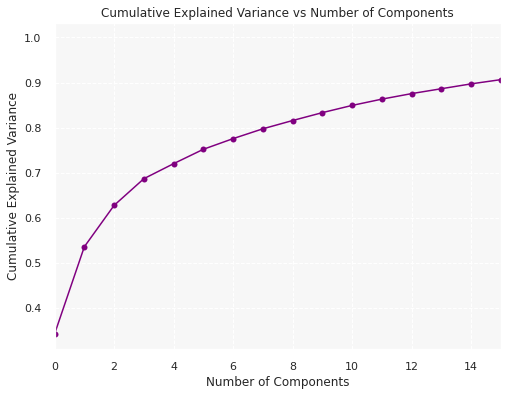

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

pca = PCA()

# Fit the PCA object to your standardized data
pca.fit(cluster_df)

# Get explained variance ratio of each principal component
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# visualising the cummulative variance
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(cumulative_var, marker='o', color='purple')
ax.set_xlabel("Number of Components")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Cumulative Explained Variance vs Number of Components")
plt.xlim([0, 15])

# Add background color and style
ax.set_facecolor('#f7f7f7')
ax.grid(color='white', linestyle='--', linewidth=1)

plt.show()

In [ ]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(cluster_df)

# transform data to principal component space
pca_df = pca.transform(cluster_df)

# variance explained by three components
print(f'Cumulative variance explained by 3 principal components: {np.sum(pca.explained_variance_ratio_)}')

Cumulative variance explained by 3 principal components: 0.6271500112615043


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used Principal Component Analysis technique. PCA is a commonly used unsupervised technique for reducing the dimensionality of high-dimensional datasets while retaining most of the variation present in the original data.

PCA is a suitable technique in this case because you have more than 40 features, and using all of them for clustering may result in a high-dimensional space that can make it challenging to visualize and analyze the data. PCA reduces the dimensionality of the data by transforming the original features into a new set of orthogonal features that represent the most important patterns in the data. These new features, called principal components, are ordered by the amount of variance they explain in the original data.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

**Not Required**

The train-test split is a technique for evaluating the performance of a machine learning algorithm. primary used for classification or regression problems and can be used for any supervised learning algorithm. Since This is an Unsuopervised ML problem and we dont require an a validation data, we are not going to use this. 

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***